# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

## Load the Data

In [49]:
df = pd.read_csv('Traffic_Accidents.csv')

df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21.0,3.0,2.0,2.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20.0,2.0,1.0,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1.0,3.0,2.0,2.0,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20.0,3.0,2.0,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21.0,3.0,1.0,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [50]:
df.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,32461.000000,32461.000000,32461.000000,32461.000000,32460.000000,32460.000000,32460.000000,31944.000000,32460.000000,32132.000000,32459.000000,32459.000000,32459.000000,31807.000000,32459.000000,32459.000000,32459.000000,32459.0
mean,52271.168325,439656.098395,338935.785096,-1.425805,52.942250,11.084535,2.847782,1.841880,1.356377,4.117204,154.936782,4.082381,1024.432515,36.724935,2.936967,335.165902,1.249268,2005.0
std,30261.221478,66611.734339,115839.884448,0.973967,1.045808,9.550542,0.391099,0.711803,0.808155,1.936503,114.083958,1.415604,1879.653495,12.696963,3.143178,1197.030229,0.432667,0.0
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,25916.000000,388060.000000,193980.000000,-2.180547,51.629679,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,52218.000000,429380.000000,361940.000000,-1.554018,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,84.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,78461.000000,515900.000000,416280.000000,-0.314537,53.641305,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,104949.000000,559570.000000,655260.000000,0.349947,55.790657,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9705.000000,3.000000,2005.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32461 entries, 0 to 32460
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   32461 non-null  int64  
 1   Accident_Index                               32461 non-null  object 
 2   Location_Easting_OSGR                        32461 non-null  float64
 3   Location_Northing_OSGR                       32461 non-null  float64
 4   Longitude                                    32461 non-null  float64
 5   Latitude                                     32460 non-null  float64
 6   Police_Force                                 32460 non-null  float64
 7   Accident_Severity                            32460 non-null  float64
 8   Number_of_Vehicles                           31944 non-null  float64
 9   Number_of_Casualties                         32460 non-null  float64
 10

In [52]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,1
Police_Force,1
Accident_Severity,1
Number_of_Vehicles,517
Number_of_Casualties,1


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [53]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
threshold = 3
outliers = df[(z_scores < threshold).all(axis=1)]

In [54]:
df_cleaned = df.dropna()

In [55]:
missing_values = df_cleaned.isnull().sum()
print("Missing values after handling:\n", missing_values)

Missing values after handling:
 Unnamed: 0                                     0
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                       

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [56]:
selected_features = ['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area']

In [57]:
data_encoded = pd.get_dummies(df[selected_features])
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = imputer.fit_transform(data_encoded)

In [58]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)
pca = PCA(n_components=0.9)
pca_data = pca.fit_transform(scaled_data)

In [38]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_data)
silhouette_avg = silhouette_score(pca_data, clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
print(f'Silhouette Score: {silhouette_avg}')
print(f'First 10 cluster assignments: {clusters[:10]}')

Silhouette Score: 0.3307849134776688
First 10 cluster assignments: [1 1 1 0 0 1 1 1 2 0]


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

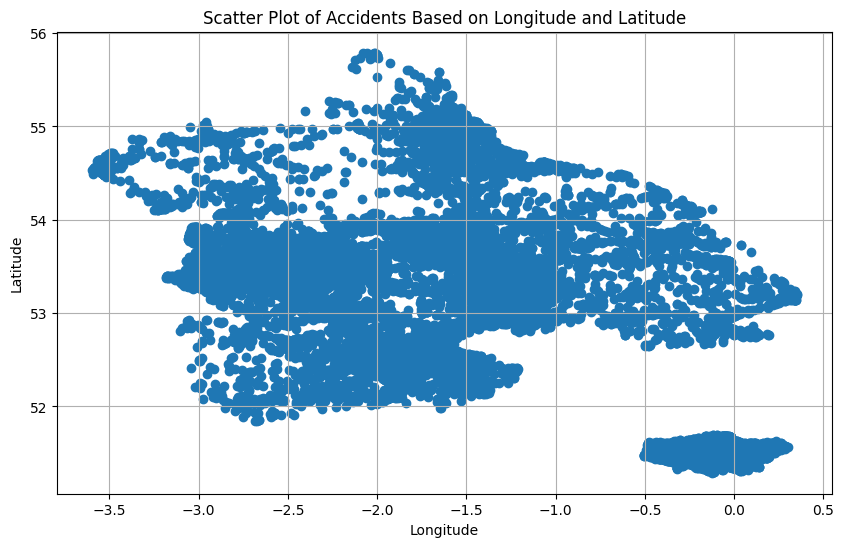

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'])
plt.title('Scatter Plot of Accidents Based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [41]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

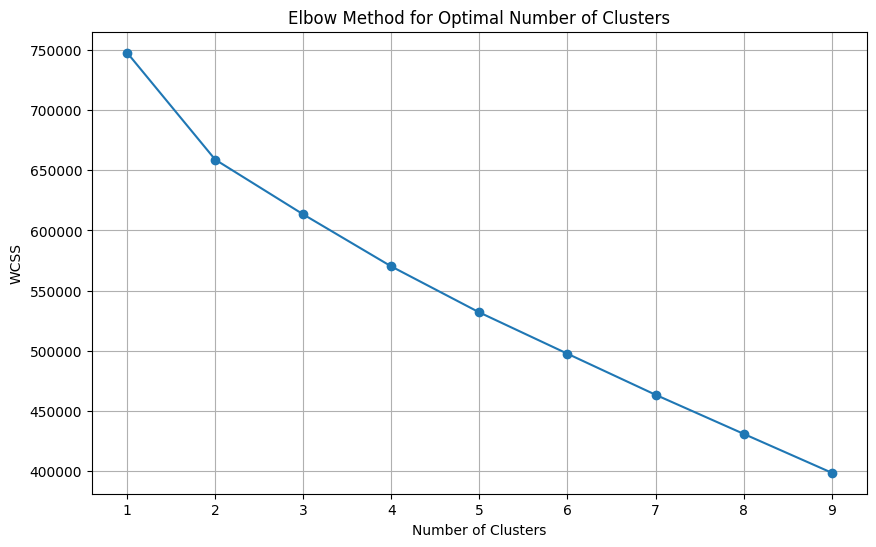

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [43]:
optimal_clusters = 2

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [44]:
# Evaluate using the silhouette score
silhouette_avg = silhouette_score(pca_data, clusters)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Cluster Centers:\n{kmeans.cluster_centers_}')

Silhouette Score: 0.33937498974117486
Cluster Centers:
[[ 2.47502201 -0.03116559 -0.29452778 -0.03565891 -0.15745944 -0.11587124
   0.03298489 -0.01921215 -0.18145756 -0.0669944   0.01746328  0.02993266
  -0.0201455  -0.01951038 -0.0630174   0.10673828 -0.10984005  0.25049235]
 [-1.06052144  0.01335413  0.12620212  0.01527948  0.06746975  0.04964963
  -0.01413369  0.00823221  0.0777527   0.02870641 -0.00748284 -0.01282584
   0.00863214  0.00836     0.02700231 -0.04573625  0.04706533 -0.10733339]]


## Plot the data points with their predicted cluster center

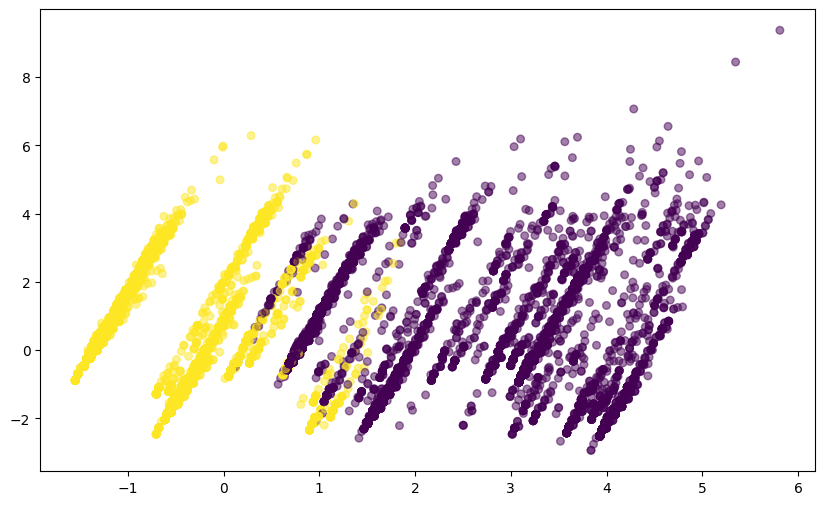

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5, s=30, label='Data Points')

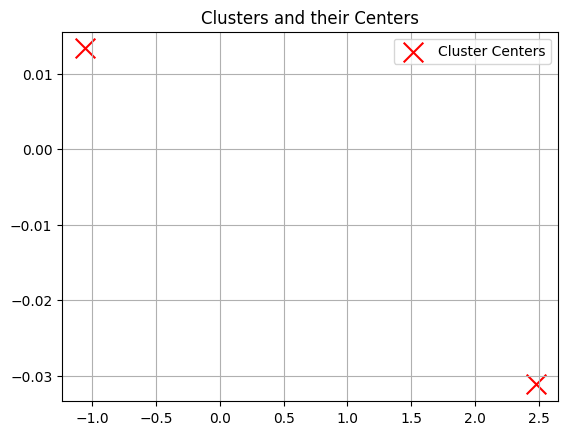

In [46]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('Clusters and their Centers')
plt.legend()
plt.grid(True)
plt.show()

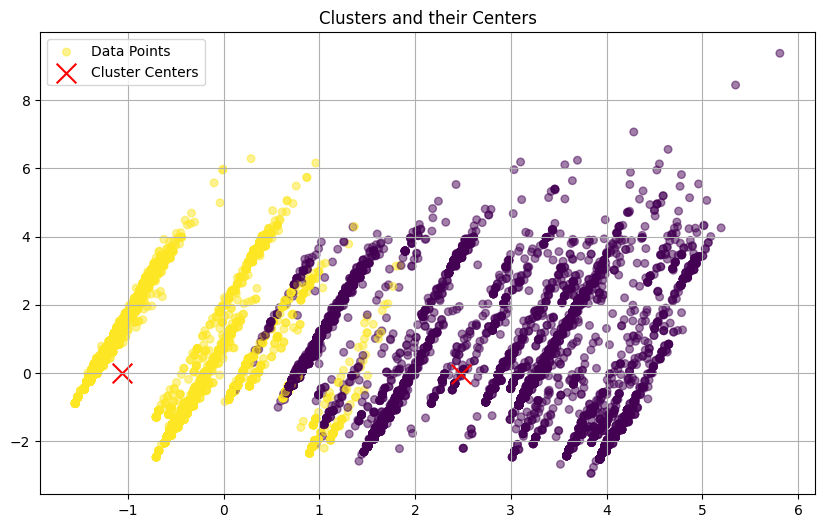

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5, s=30, label='Data Points')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('Clusters and their Centers')
plt.legend()
plt.grid(True)
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?<br>

 **Accident_Severity**

 **Number_of_Vehicles**

 **Number_of_Casualties**

 **Speed_limit**

 **Light_Conditions**

 **Weather_Conditions**

 **Road_Surface_Conditions**

 **Urban_or_Rural_Area**<br>

 **These features were chosen because they are directly related to the characteristics and conditions of traffic accidents.**
<br>
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
   <br>**using the Elbow Method.**
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   <br>**Silhouette Score, It measures how similar each point is to its own cluster compared to other clusters. Showed result in 0.33, the closer the silhouette to 1 the better and vice virsa.**
   <br>
   - How do these metrics help in understanding the effectiveness of your clustering approach?
   <br>**Visualizing the clusters along with their centers helps in intuitively understanding the cluster structure.**
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?
   <br>**Adding more feature engineering does improve the clustering. as well as doing the DBSCAN for outliers.**